### Setting the research goal

* Clear research goal: predicting house prices based on the features given.
* Project mission and context: finding optimal model
* How you are going to conduct the analysis: analysing the data and its relationship with the variables/features provided, building an unbiased model
* Resources used: USA_Housing.csv dataset
* Proof that this is an achieveable project, or proof of concepts: There exists dependance of the price variable on other variables
* Results and measure of success:
* Timeline: **08.08.2021**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings            
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("../input/usa-housing-data/USA_Housing (1).csv").drop("Unnamed: 0",axis=1);
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,4994.0,6.987845e+00,1.005156,3.236194,6.299460,7.002902e+00,7.666328e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,4.101330e+00,2.741199,2.000000,3.140000,4.050000e+00,4.490000e+00,5.600000e+01
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,4977.0,1.228546e+06,358884.116227,0.430088,995783.162483,1.231452e+06,1.470427e+06,2.469066e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4994 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         4977 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#Changing column names

data.rename(columns={
    "Avg. Area Income": "Income",
    "Avg. Area House Age": "Age",
    "Avg. Area Number of Rooms": "Rooms",
    "Avg. Area Number of Bedrooms": "Bedrooms",
    "Area Population": "Population",
},inplace=True)

In [6]:
data

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


### Data Preparation

In [7]:
data.columns[data.isnull().any()]

Index(['Rooms', 'Price'], dtype='object')

In [8]:
data.isnull().sum()

Income         0
Age            0
Rooms          6
Bedrooms       0
Population     0
Price         23
Address        0
dtype: int64

In [9]:
#discarding rows with missing values

data.dropna(axis=0, how='any', inplace=True)
data.isnull().sum()

Income        0
Age           0
Rooms         0
Bedrooms      0
Population    0
Price         0
Address       0
dtype: int64

In [10]:
data

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


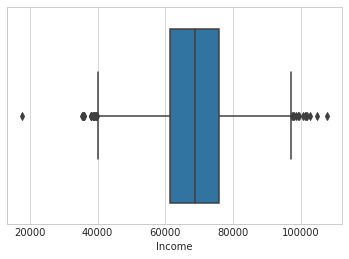

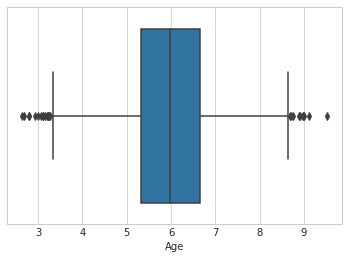

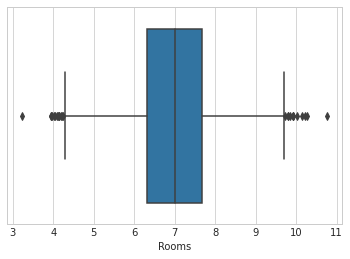

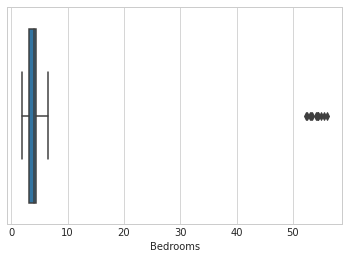

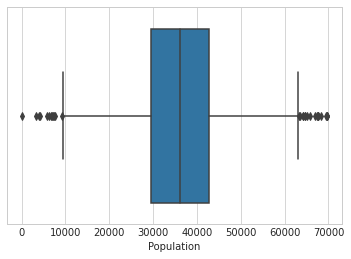

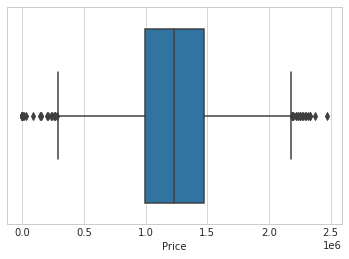

In [11]:
#analysing outliers

column_list = ["Income","Age","Rooms","Bedrooms","Population","Price"]
for col in column_list:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()

In [12]:
#interpolating values

#for income

df_table = data["Income"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Income"][outliers_vector.index.values] = np.nan
data["Income"] = data["Income"].interpolate()

#for age

df_table = data["Age"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Age"][outliers_vector.index.values] = np.nan
data["Age"] = data["Age"].interpolate()

#for bedrooms

df_table = data["Bedrooms"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Bedrooms"][outliers_vector.index.values] = np.nan
data["Bedrooms"] = data["Bedrooms"].interpolate()

#for rooms

df_table = data["Rooms"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Rooms"][outliers_vector.index.values] = np.nan
data["Rooms"] = data["Rooms"].interpolate()

#for population

df_table = data["Population"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Population"][outliers_vector.index.values] = np.nan
data["Population"] = data["Population"].interpolate()

#for price

df_table = data["Price"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector = df_table[outliers_vector]
data["Price"][outliers_vector.index.values] = np.nan
data["Price"] = data["Price"].interpolate()

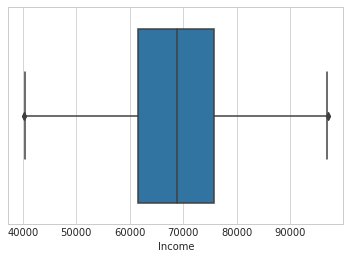

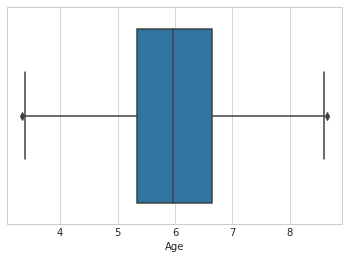

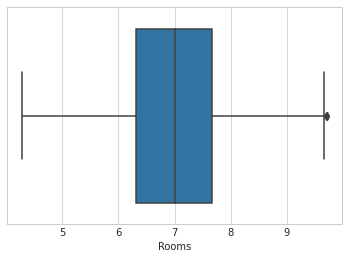

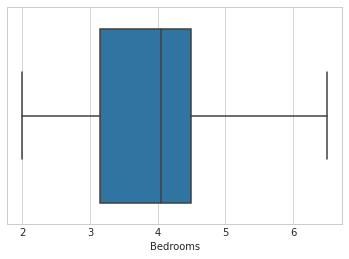

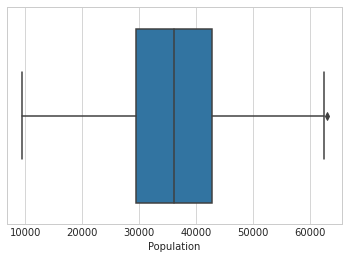

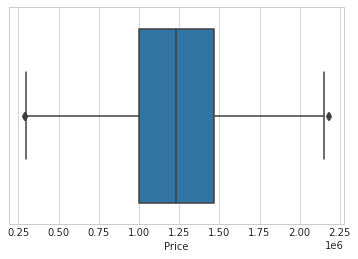

In [13]:
#checking for outliers

for col in column_list:
    sns.boxplot(x = data[col])
    plt.xlabel(col)
    plt.show()

## Data Exploration

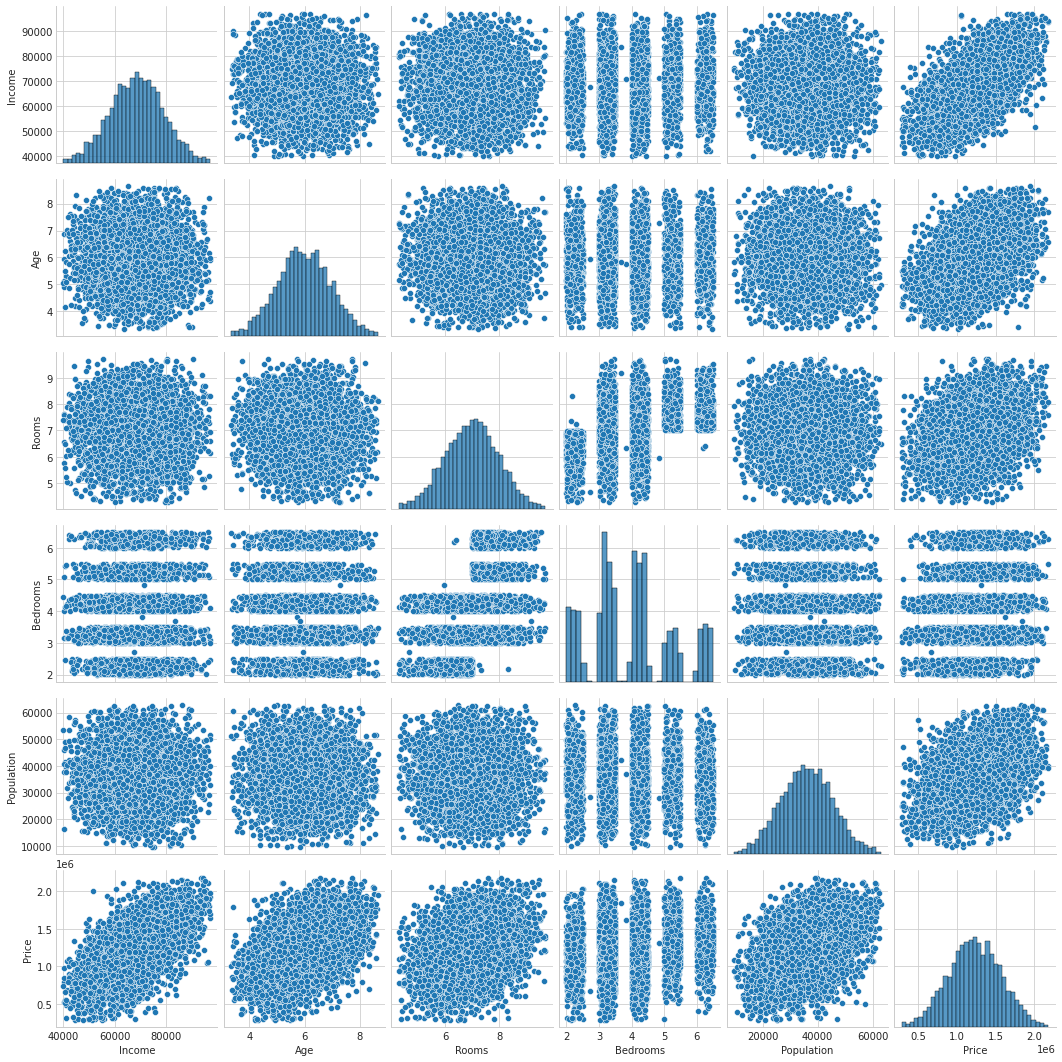

In [14]:
#plots to check data

df_table=data.copy()

exploration = sns.pairplot(df_table.drop(['Address'],axis=1))

<AxesSubplot:xlabel='Price', ylabel='Density'>

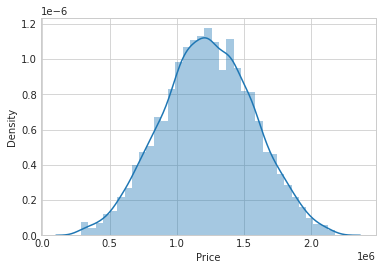

In [15]:
sns.distplot(df_table['Price'])

In [16]:
df_table.corr()

,Income,Age,Rooms,Bedrooms,Population,Price
Income,1.000000,-0.004528,-0.014717,0.019462,-0.001536,0.606877
Age,-0.004528,1.000000,-0.010640,0.008608,-0.014969,0.427262
Rooms,-0.014717,-0.010640,1.000000,0.465274,-0.003202,0.314446
Bedrooms,0.019462,0.008608,0.465274,1.000000,-0.021089,0.166247
Population,-0.001536,-0.014969,-0.003202,-0.021089,1.000000,0.391567
Price,0.606877,0.427262,0.314446,0.166247,0.391567,1.000000


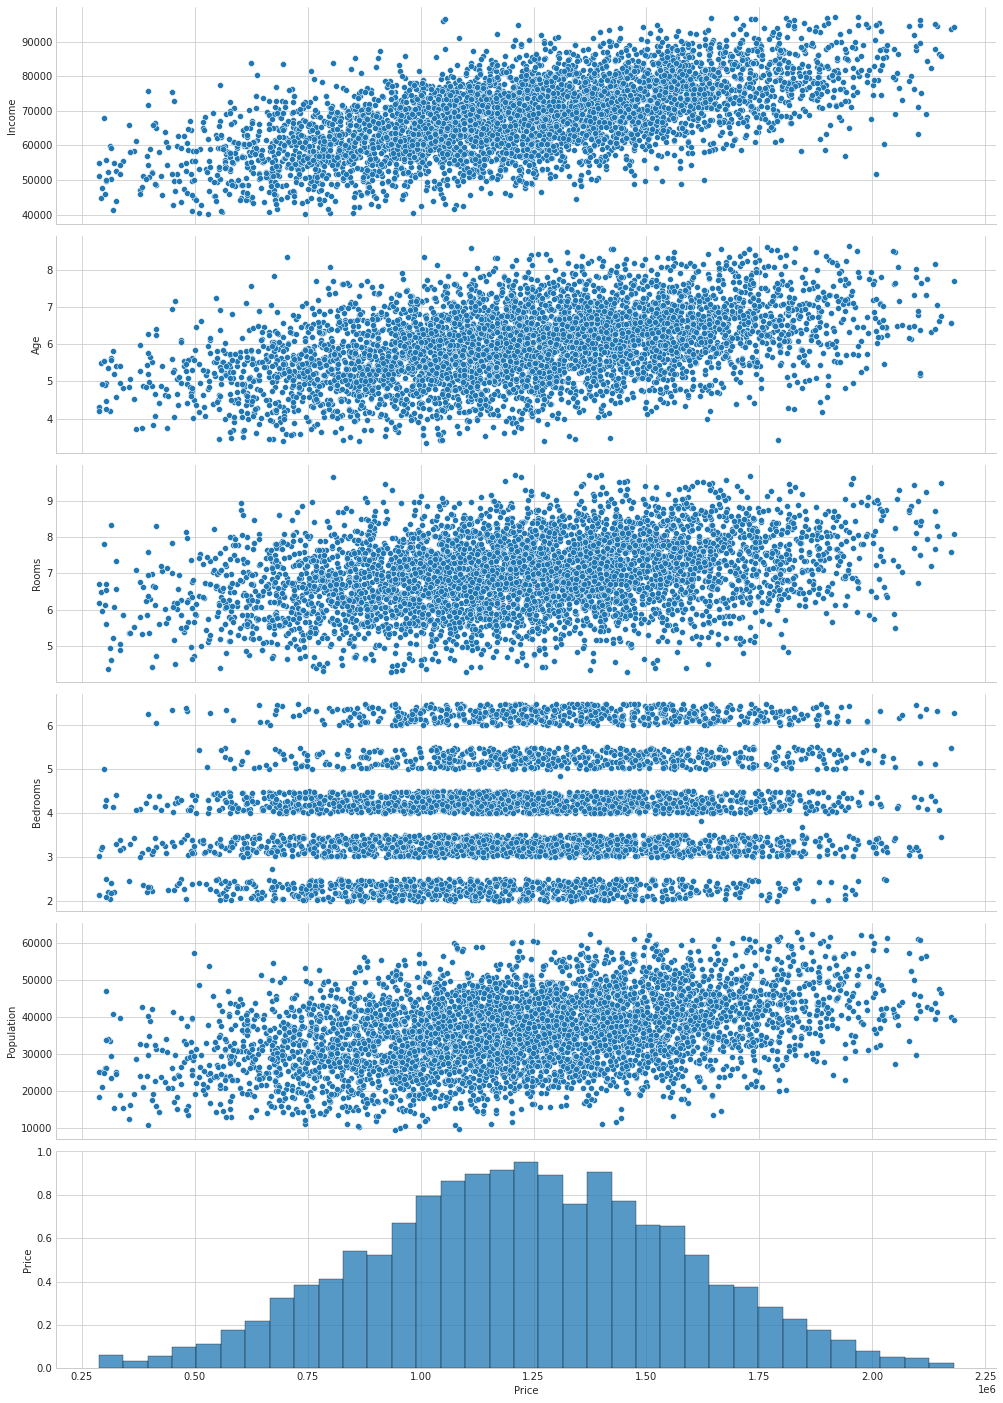

In [17]:
exploration = sns.pairplot(df_table.drop(['Address'],axis=1), x_vars='Price', y_vars = df_table.drop(['Address'],axis=1).columns)
exploration.fig.set_size_inches(20,20)

### Data Modeling

* analysing the relationship between two continuous (quantitative) variables using linear regression.

#### price - income

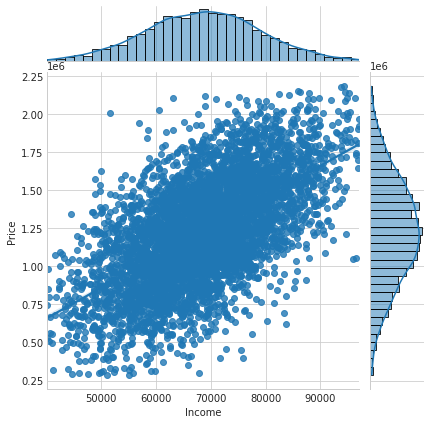

In [18]:
sns.jointplot(x="Income",y="Price",data=df_table,kind="reg")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = data[["Income"]]
y = data[["Price"]]

reg = LinearRegression()
model = reg.fit(X,y)

print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  [-144114.93353649]
coef:  [[20.04528636]]
rscore.  0.3682992891592144


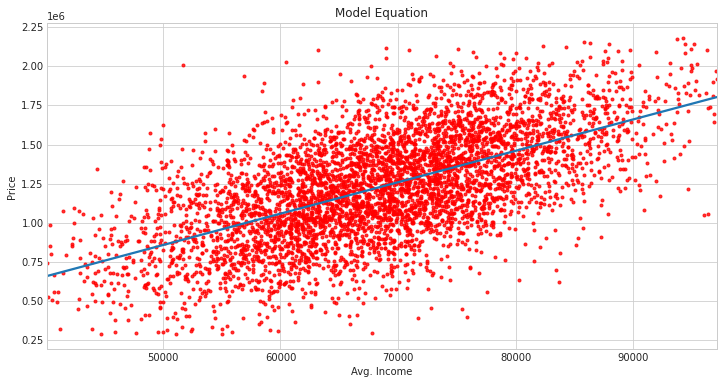

In [21]:
#prediction

plt.figure(figsize=(12,6))
g = sns.regplot(x=data["Income"],y=data["Price"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Price")
g.set_xlabel("Avg. Income")
plt.show()

### Multiple Regression

In [22]:
import statsmodels.api as sms
from sklearn import linear_model

X = data.drop(["Price",'Address'],axis=1)
y = data['Price']

regr = linear_model.LinearRegression()
model= regr.fit(X, y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  -2401371.106361565
coef:  [2.02851703e+01 1.54942882e+05 1.13536988e+05 2.00749214e+03
 1.41944193e+01]
rscore.  0.8209380194081427


### Presentation and Automation

In [23]:
def linear_reg(col,prdctn):
    
    X = data[[col]]
    y = data[["Price"]]
    reg = LinearRegression()
    model = reg.fit(X,y)
    
    # prediction
    plt.figure(figsize=(12,6))
    g = sns.regplot(x=data[col],y=data["Price"],ci=None,scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("score")
    g.set_xlabel(col)
    plt.show()
    
    print("The model prediction is: ", model.predict([[prdctn]]))

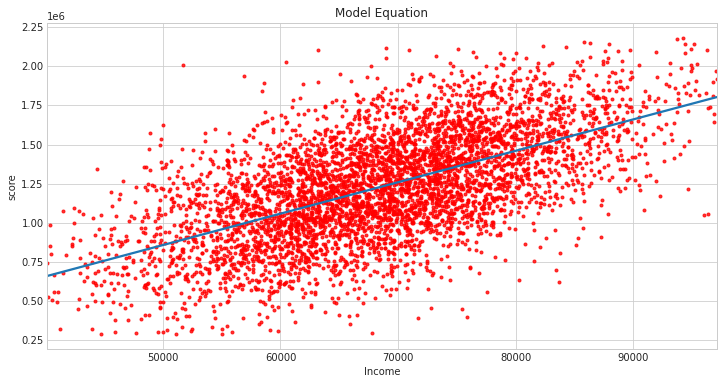

The model prediction is:  [[-144074.84296377]]


In [25]:
linear_reg('Income',2)